In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
data = pd.read_csv("Downloads\\Housing (1).csv")
display(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [17]:
data['INDUS'] = data['INDUS'].fillna(data['INDUS'].mean())
data['AGE'] = data['AGE'].fillna(data['AGE'].mean())
data['RAD'] = data['RAD'].fillna(data['RAD'].mean())
data['LSTAT'] = data['LSTAT'].fillna(data['LSTAT'].mean())
data['NOX'] = data['NOX'].fillna(data['NOX'].median())

In [18]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    509 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      509 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      509 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      509 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    509 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [22]:
data.describe().astype(int)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509,509,509,509,509,509,509,509,509,509,509,509,509,509
mean,3,11,11,0,0,6,68,3,9,409,18,356,12,22
std,8,23,6,0,0,0,28,2,8,168,2,91,7,9
min,0,0,0,0,0,3,2,1,1,187,12,0,1,5
25%,0,0,5,0,0,5,45,2,4,279,17,375,7,17
50%,0,0,9,0,0,6,77,3,5,330,19,391,11,21
75%,3,12,18,0,0,6,94,5,24,666,20,396,16,25
max,88,100,27,1,0,8,100,12,24,711,22,396,37,50


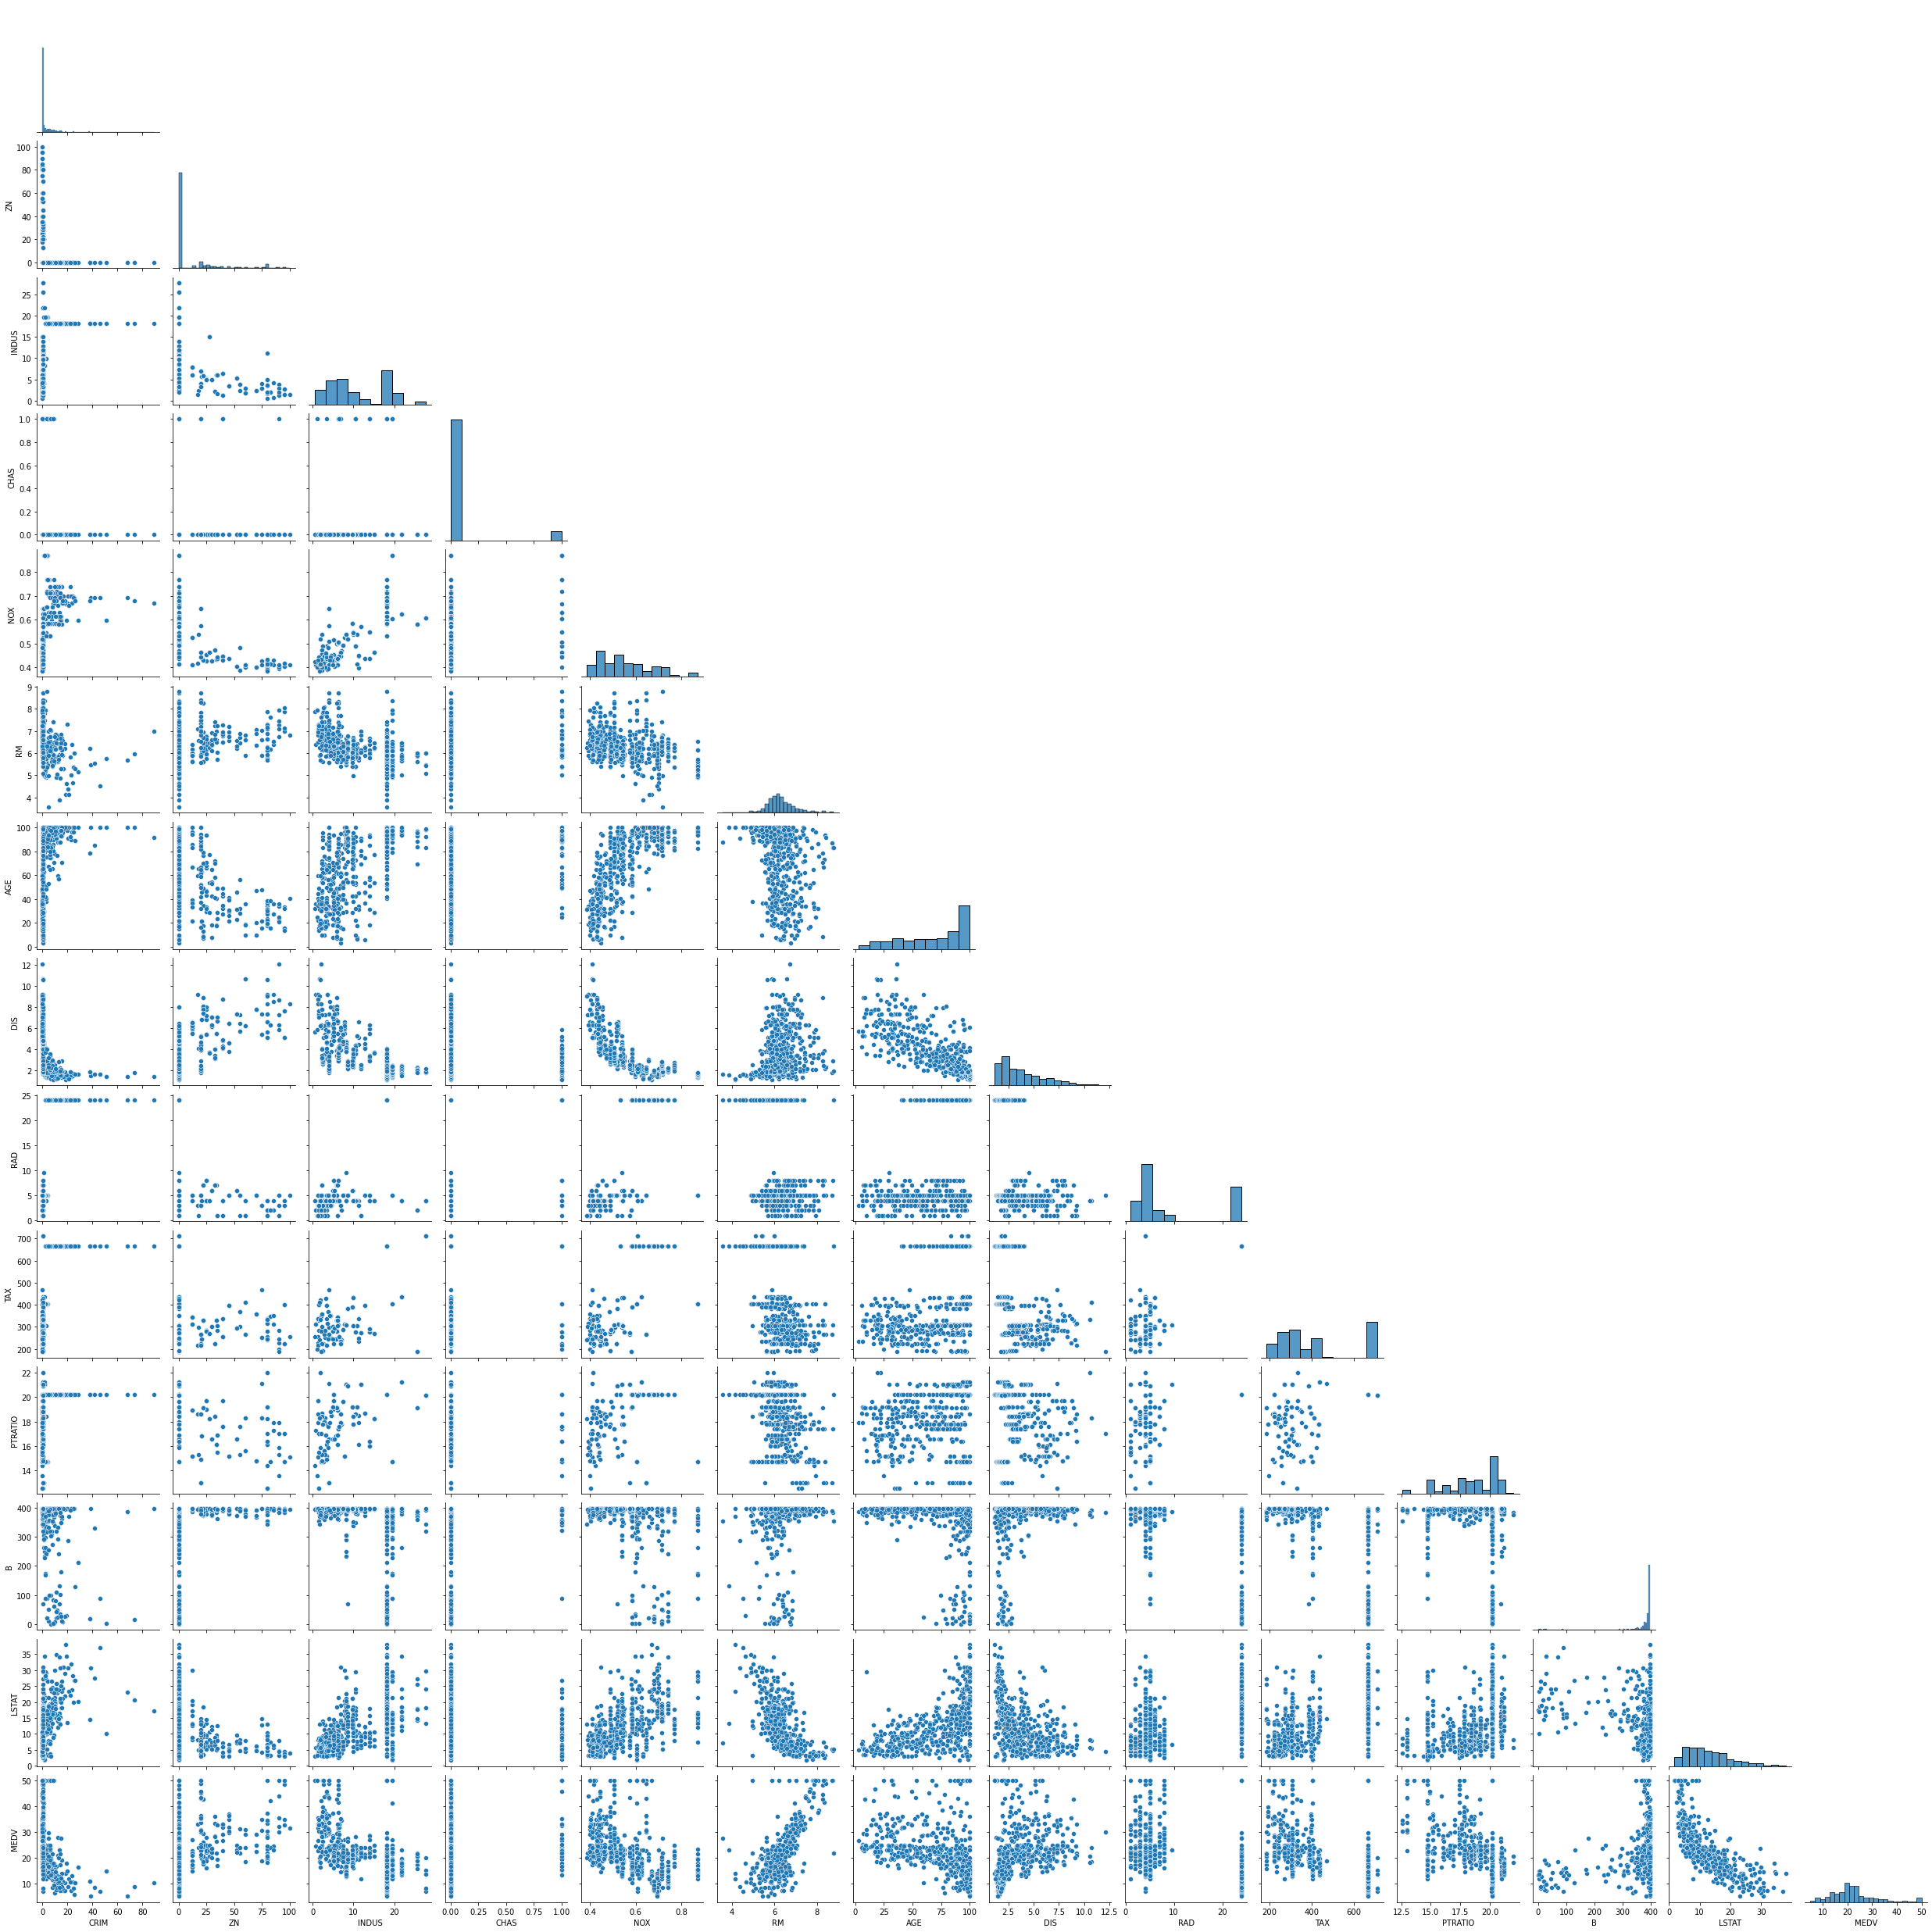

In [23]:
sns.pairplot(data, corner = True)

In [28]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [29]:
class Evaluation:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        
    def evaluate(self, model, name):
        x, y = self.train
        y_pred = model.predict(x)
        mae = mean_absolute_error(y_pred, y)
        mse = mean_squared_error(y_pred, y)
        r2 = r2_score(y_pred, y)
        print(name, "\n", "-"*20)
        print("MAE: {}\nMSE: {}\nr2: {}".format(mae, mse, r2))
        
    def training(self, model, name):
        x, y = self.train
        model.fit(x, y)
        self.evaluate(model, name)
        return model

In [30]:
lnr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=150, max_depth=115, criterion='friedman_mse',
                           max_features='log2')
dtr = DecisionTreeRegressor(max_depth=110,criterion='friedman_mse')
svr = SVR(C=0.7)
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.5)
xgb = XGBRegressor(n_estimators=1000, max_depth=11, eta=0.31)

models = [lnr, rfr, dtr, svr, abr, xgb]
names = ['Linear Regression', 'Random Forest Regressor',
        'Decision Tree Regressor', 'SVR',
        'Ada Boost Regressor', 'XGBRegressor']

assesment = Evaluation((x_train, y_train), (x_test, y_test))

In [32]:
trained = []
for i, j in zip(models, names):
    trained += [assesment.training(i, j)]
    print()

Linear Regression 
 --------------------
MAE: 3.3164655391566162
MSE: 22.446831985393672
r2: 0.6448983441454588

Random Forest Regressor 
 --------------------
MAE: 0.8518443898443873
MSE: 1.7787943882063848
r2: 0.9756696954914953

Decision Tree Regressor 
 --------------------
MAE: 0.0
MSE: 0.0
r2: 1.0

SVR 
 --------------------
MAE: 5.3958393696648965
MSE: 70.34988312263256
r2: -4.7848206852580555

Ada Boost Regressor 
 --------------------
MAE: 2.2690866066857955
MSE: 7.719965602820054
r2: 0.8873332476823518

XGBRegressor 
 --------------------
MAE: 0.0005989669874787028
MSE: 8.107937906876963e-07
r2: 0.9999999905344478



<AxesSubplot:>

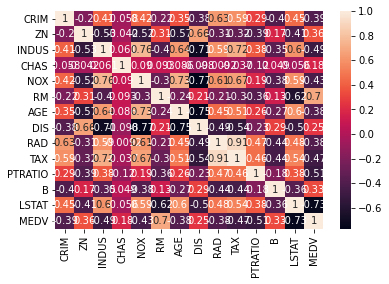

In [33]:
corr_matrix = data.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)

In [35]:
selected = []
for i in corr_matrix.index[:-1]:
    if corr_matrix.loc[i, "MEDV"] > 0.4 or corr_matrix.loc[i, "MEDV"] < -0.4:
        selected += [i]

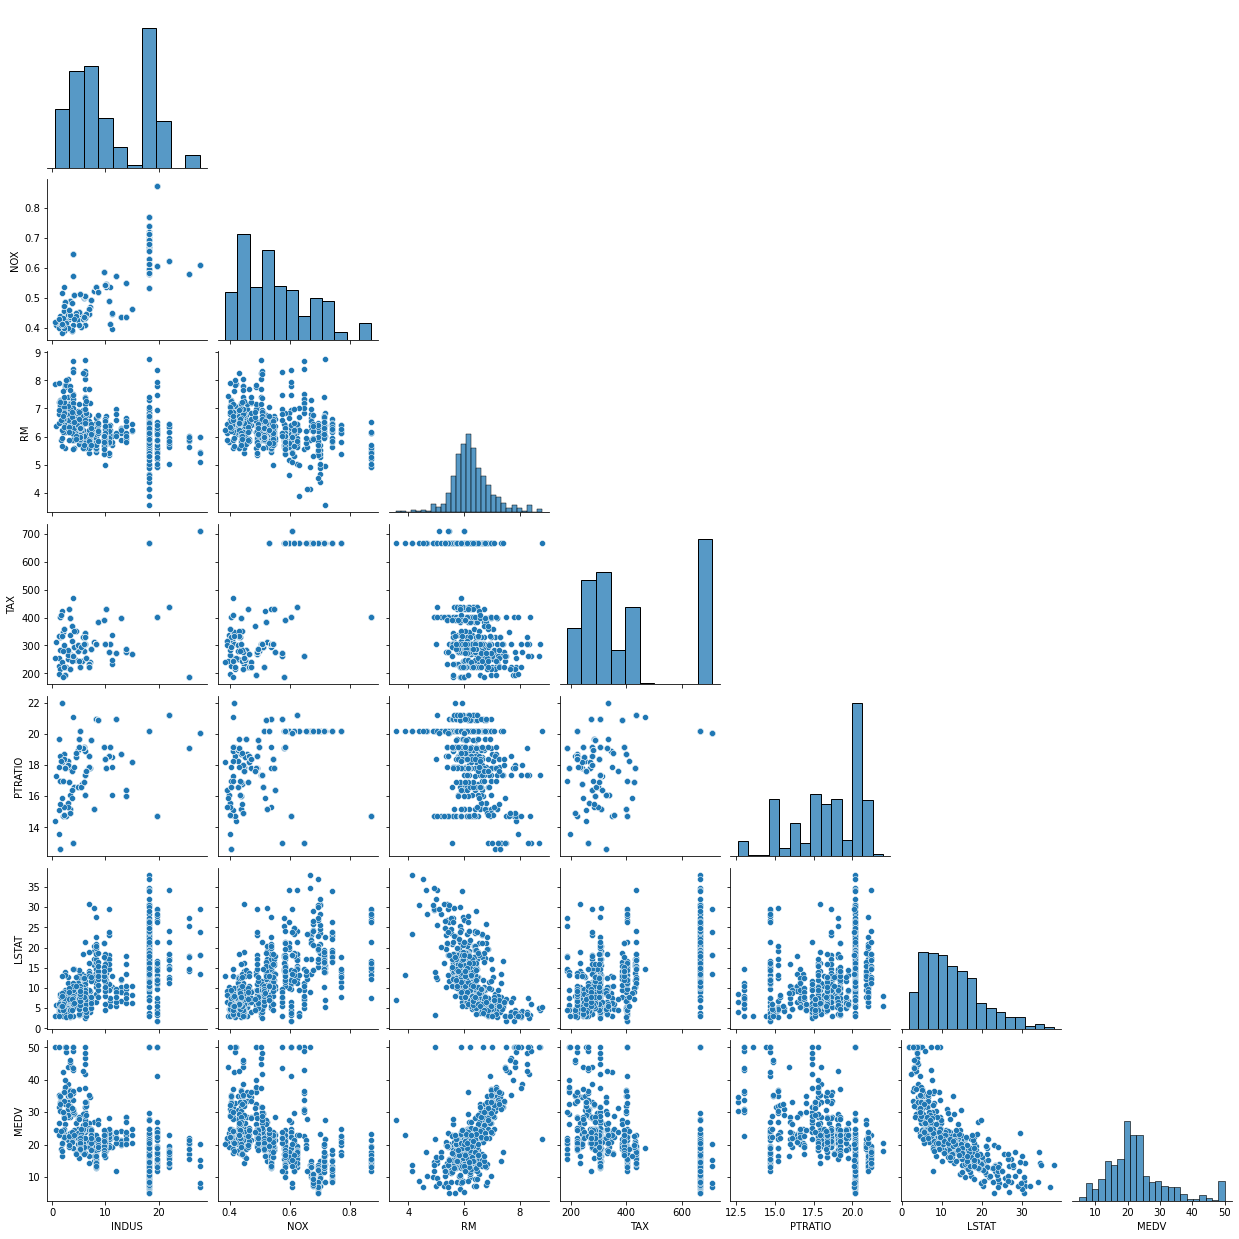

In [36]:
sns.pairplot(data, vars = selected + ['MEDV'], corner = True)

In [38]:
x_s = data.loc[:, selected].values
y_s = data.loc[:, 'MEDV'].values
xs_train, xs_test, ys_train, ys_test = train_test_split(x_s, y_s, random_state=42, test_size=0.2)

In [39]:
assesment_selected = Evaluation((xs_train, ys_train), (xs_test, ys_test))
selected_trained = []
for i, j in zip(models, names):
    selected_trained += [assesment_selected.training(i, j)]

Linear Regression 
 --------------------
MAE: 3.6387706497180914
MSE: 27.43140376444555
r2: 0.528895389085316
Random Forest Regressor 
 --------------------
MAE: 0.8569959049959054
MSE: 1.6528887840567859
r2: 0.9783616334023689
Decision Tree Regressor 
 --------------------
MAE: 0.0
MSE: 0.0
r2: 1.0
SVR 
 --------------------
MAE: 5.55544546955795
MSE: 71.77671232889364
r2: -4.345092179967167
Ada Boost Regressor 
 --------------------
MAE: 2.3452555600472893
MSE: 8.601228088905364
r2: 0.869723383162458
XGBRegressor 
 --------------------
MAE: 0.000790438546595474
MSE: 1.4230816982903446e-06
r2: 0.9999999833861476
